In [7]:
import datetime
import numpy
import os
from matplotlib import pyplot as plt
import matplotlib

In [8]:
#file paths
s_path = os.path.join(os.path.expanduser('~'), 'Documents', 'Talent Games', 
  'analytics', 'FB_stocks_year.txt')
c_path = os.path.join(os.path.expanduser('~'), 'Documents', 'Talent Games', 
  'analytics', 'FB_commits_year.txt')

In [9]:
sample_size = 365
start_year = 2017
day_list = []
for i in range (0, sample_size):
    day_list.insert(i, i)
stocks_raw = []
commits_raw = []
stocks_list = []
commits_list = []
with open(s_path) as s:
  stocks_raw = s.readlines()
with open(c_path) as c:
  commits_raw = c.readlines()

In [10]:
#stocks
prev_stock = float(stocks_raw[0].split("\t")[1])
raw_i = 0;
for i in range (0, sample_size):
  line = stocks_raw[raw_i].split("\t")
  date_string = line[0]
  stock = float(line[1])
  dt = datetime.datetime.strptime(date_string,"%Y-%m-%d")
  dt0 = datetime.datetime(start_year, 2, 1)
  day_of_year = (dt - dt0).days
  if i == day_of_year:
    stocks_list.insert(i, stock)
    prev_stock = stock
    raw_i+=1
  else:
    stocks_list.insert(i, prev_stock)

In [11]:
#commits
for i in range (0, sample_size):
  line = commits_raw[i].split("\t")
  date_string = line[0]
  commits = float(line[1])
  dt = datetime.datetime.strptime(date_string,"%Y-%m-%d")
  dt0 = datetime.datetime(start_year, 2, 1)
  day_of_year = (dt - dt0).days
  if i == day_of_year :
    if(commits > 3000):
        commits_list.insert(i, 200)
    else:
        commits_list.insert(i, commits)
  else:
    commits_list.insert(i, 0)

No handles with labels found to put in legend.


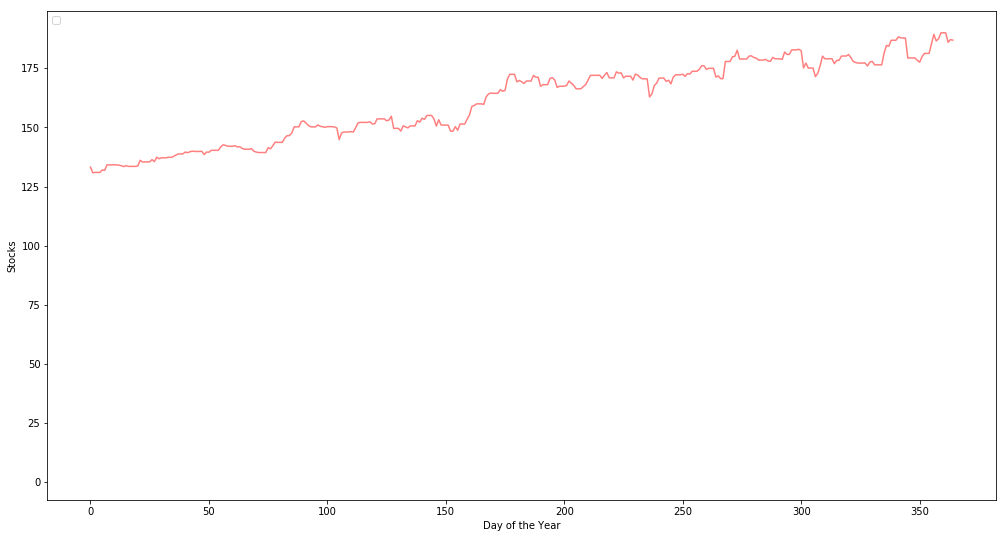

No handles with labels found to put in legend.


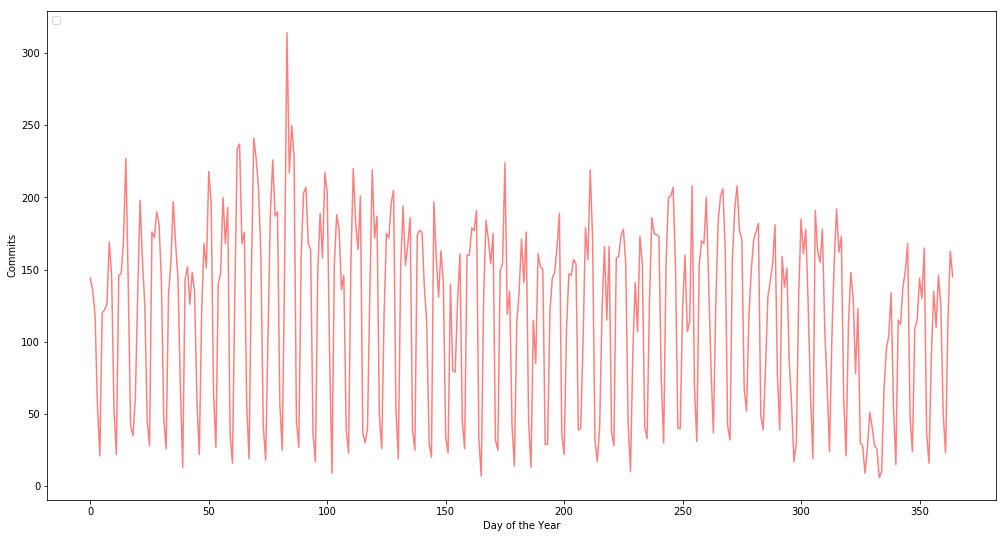

In [12]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.plot(day_list, stocks_list, 2, c="red", alpha=0.5)
plt.xlabel("Day of the Year")
plt.ylabel("Stocks")
plt.legend(loc=2)
plt.show()

plt.plot(day_list, commits_list, 200, c="red", alpha=0.5)
plt.xlabel("Day of the Year")
plt.ylabel("Commits")
plt.legend(loc=2)
plt.show()